### (PART 1) Code in VSCode: Convert the temperature scale from Kelvin to Celsius, output the maps, zonal statistics.

In [ ]:
import arcpy
from arcpy.ia import *

# daytime

def Model():  # Model

    # To allow overwriting outputs change overwriteOutput option to True.
    arcpy.env.overwriteOutput = False

    # Check out any necessary licenses.
    arcpy.CheckOutExtension("spatial")
    arcpy.CheckOutExtension("ImageAnalyst")
    arcpy.CheckOutExtension("3D")
    arcpy.CheckOutExtension("ImageExt")

    daytime = ['ECOSTRESS_L2_LSTE_00589_007_20180813T164649_0601_03_LST_GEO.tif',
               'ECOSTRESS_L2_LSTE_06367_004_20190820T130156_0601_02_LST_GEO.tif',
               'ECOSTRESS_L2_LSTE_11935_004_20200813T150118_0601_01_LST_GEO.tif',
               'ECOSTRESS_L2_LSTE_17570_005_20210811T153025_0601_01_LST_GEO.tif',
               'ECOSTRESS_L2_LSTE_23253_005_20220812T143102_0601_01_LST_GEO.tif',
               'ECOSTRESS_L2_LSTE_28995_005_20230817T120639_0601_02_LST_GEO.tif']

    nighttime = ['ECOSTRESS_L2_LSTE_00487_004_20180807T034558_0601_03_LST_GEO',
                 'ECOSTRESS_L2_LSTE_06082_007_20190802T044230_0601_02_LST_GEO',
                 'ECOSTRESS_L2_LSTE_11757_014_20200802T035214_0601_01_LST_GEO',
                 'ECOSTRESS_L2_LSTE_17513_017_20210808T011223_0601_01_LST_GEO',
                 'ECOSTRESS_L2_LSTE_23258_015_2022_LST_GEO',
                 'ECOSTRESS_L2_LSTE_28939_007_2023_LST_GEO']

    year = ['2018', '2019', '2020', '2021', '2022', '2023']

    for i in range(0,6):

        # Change the path to the file for the following 3 parameters:
        tif = arcpy.Raster("C:\\Users\MEI-KUEI LU\\Downloads\\GIS_FinalProject\\daytime_selected\\" + daytime[i])
        StudyExtent = "C:\\Users\\MEI-KUEI LU\\Downloads\\GIS_FinalProject\\shapefile\\StudyExtent"
        boundary_merge = "C:\\Users\\MEI-KUEI LU\\Downloads\\GIS_FinalProject\\ArcGISPro\\boundary_merge"

        # Process: Clip Raster (Clip Raster) (management)
        Kelvin_tif = "C:\\Users\\MEI-KUEI LU\\Downloads\\GIS_FinalProject\\daytime_selected\\clip\\kelvin_" + year[i] + ".tif"
        arcpy.management.Clip(in_raster = tif, rectangle="-96.429654776531 29.4630991467366 -94.897061411858 30.7702184730133", out_raster=Kelvin_tif, in_template_dataset=StudyExtent, nodata_value="0", clipping_geometry="ClippingGeometry", maintain_clipping_extent="NO_MAINTAIN_EXTENT")
        Kelvin_tif = arcpy.Raster(Kelvin_tif)

        # Process: Raster Calculator (Raster Calculator) (ia)
        Celsius_tif = "C:\\Users\\MEI-KUEI LU\\Downloads\\GIS_FinalProject\\daytime_selected\\clip\\Celsius\\celsius_" + year[i] + ".tif"
        Raster_Calculator = Celsius_tif
        with arcpy.EnvManager(snapRaster=Kelvin_tif):
            Celsius_tif = Kelvin_tif-273.15
            Celsius_tif.save(Raster_Calculator)


        # Process: Zonal Statistics as Table (Zonal Statistics as Table) (sa)
        Zonal = "C:\\Users\\MEI-KUEI LU\\Downloads\\GIS_FinalProject\\ArcGISPro\\GIS_FinalProject.gdb\\Zonal_nighttime" + year[i]
        arcpy.sa.ZonalStatisticsAsTable(in_zone_data=boundary_merge, zone_field="Name", in_value_raster= Celsius_tif, out_table=Zonal, ignore_nodata="DATA", statistics_type="ALL", process_as_multidimensional="CURRENT_SLICE", percentile_values=90, percentile_interpolation_type="AUTO_DETECT")
        #.save(Zonal_Statistics_as_Table)


if __name__ == '__main__':
    # Global Environment settings
    with arcpy.EnvManager(scratchWorkspace=r"C:\Users\MEI-KUEI LU\Downloads\GIS_FinalProject\ArcGISPro\GIS_FinalProject.gdb", workspace=r"C:\Users\MEI-KUEI LU\Downloads\GIS_FinalProject\ArcGISPro\GIS_FinalProject.gdb"):
        Model()


In [ ]:
# nighttime

# -*- coding: utf-8 -*-
"""
Generated by ArcGIS ModelBuilder on : 2023-11-14 17:47:17
"""
import arcpy
from arcpy.ia import *


def Model():  # Model

    # To allow overwriting outputs change overwriteOutput option to True.
    arcpy.env.overwriteOutput = False

    # Check out any necessary licenses.
    arcpy.CheckOutExtension("spatial")
    arcpy.CheckOutExtension("ImageAnalyst")
    arcpy.CheckOutExtension("3D")
    arcpy.CheckOutExtension("ImageExt")

    daytime = ['ECOSTRESS_L2_LSTE_00589_007_20180813T164649_0601_03_LST_GEO.tif',
               'ECOSTRESS_L2_LSTE_06367_004_20190820T130156_0601_02_LST_GEO.tif',
               'ECOSTRESS_L2_LSTE_11935_004_20200813T150118_0601_01_LST_GEO.tif',
               'ECOSTRESS_L2_LSTE_17570_005_20210811T153025_0601_01_LST_GEO.tif',
               'ECOSTRESS_L2_LSTE_23253_005_20220812T143102_0601_01_LST_GEO.tif',
               'ECOSTRESS_L2_LSTE_28995_005_20230817T120639_0601_02_LST_GEO.tif']

    nighttime = ['ECOSTRESS_L2_LSTE_00487_004_20180807T034558_0601_03_LST_GEO.tif',
                 'ECOSTRESS_L2_LSTE_06082_007_20190802T044230_0601_02_LST_GEO.tif',
                 'ECOSTRESS_L2_LSTE_11757_014_20200802T035214_0601_01_LST_GEO.tif',
                 'ECOSTRESS_L2_LSTE_17513_017_20210808T011223_0601_01_LST_GEO.tif',
                 'ECOSTRESS_L2_LSTE_23258_015_2022_LST_GEO.tif',
                 'ECOSTRESS_L2_LSTE_28939_007_2023_LST_GEO.tif']

    year = ['2018', '2019', '2020', '2021', '2022', '2023']

    for i in range(0,6):

        # Change the path to the file for the following 3 parameters:
        tif = arcpy.Raster("C:\\Users\MEI-KUEI LU\\Downloads\\GIS_FinalProject\\nighttime_selected\\" + nighttime[i])
        StudyExtent = "C:\\Users\\MEI-KUEI LU\\Downloads\\GIS_FinalProject\\shapefile\\StudyExtent"
        boundary_merge = "C:\\Users\\MEI-KUEI LU\\Downloads\\GIS_FinalProject\\ArcGISPro\\boundary_merge"

        # Process: Clip Raster (Clip Raster) (management)
        Kelvin_tif = "C:\\Users\\MEI-KUEI LU\\Downloads\\GIS_FinalProject\\nighttime_selected\\clip\\kelvin_" + year[i] + ".tif"
        arcpy.management.Clip(in_raster = tif, rectangle="-96.429654776531 29.4630991467366 -94.897061411858 30.7702184730133", out_raster=Kelvin_tif, in_template_dataset=StudyExtent, nodata_value="0", clipping_geometry="ClippingGeometry", maintain_clipping_extent="NO_MAINTAIN_EXTENT")
        Kelvin_tif = arcpy.Raster(Kelvin_tif)

        # Process: Raster Calculator (Raster Calculator) (ia)
        Celsius_tif = "C:\\Users\\MEI-KUEI LU\\Downloads\\GIS_FinalProject\\nighttime_selected\\clip\\Celsius\\celsius_" + year[i] + ".tif"
        Raster_Calculator = Celsius_tif
        with arcpy.EnvManager(snapRaster=Kelvin_tif):
            Celsius_tif = Kelvin_tif-273.15
            Celsius_tif.save(Raster_Calculator)


        # Process: Zonal Statistics as Table (Zonal Statistics as Table) (sa)
        Zonal = "C:\\Users\\MEI-KUEI LU\\Downloads\\GIS_FinalProject\\ArcGISPro\\GIS_FinalProject.gdb\\Zonal_" + year[i]
        arcpy.sa.ZonalStatisticsAsTable(in_zone_data=boundary_merge, zone_field="Name", in_value_raster= Celsius_tif, out_table=Zonal, ignore_nodata="DATA", statistics_type="ALL", process_as_multidimensional="CURRENT_SLICE", percentile_values=90, percentile_interpolation_type="AUTO_DETECT")
        #.save(Zonal_Statistics_as_Table)


if __name__ == '__main__':
    # Global Environment settings
    with arcpy.EnvManager(scratchWorkspace=r"C:\Users\MEI-KUEI LU\Downloads\GIS_FinalProject\ArcGISPro\GIS_FinalProject.gdb", workspace=r"C:\Users\MEI-KUEI LU\Downloads\GIS_FinalProject\ArcGISPro\GIS_FinalProject.gdb"):
        Model()


### (PART2) Code in Jupyter Notebook: Extract the temperature of multi cities from 2018 to 2023 and draw a line plot. (The output results are 2 lineplots for daytime and nighttime with different lines showing different locations).

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


file_path = './daytime.csv'
file_path1 = './nighttime.csv'

df = pd.read_csv(file_path)
dg = pd.read_csv(file_path1)

df.head()
dg.head()

,year,time,location,mean,min,max,range,sd,median,P90
0,2018,Nighttime,College Station,27.14,23.43,32.33,8.90,1.24,27.15,28.71
1,2019,Nighttime,College Station,27.63,22.79,33.57,10.78,1.51,27.65,29.57
2,2020,Nighttime,College Station,24.22,15.33,28.11,12.78,1.09,24.21,25.45
3,2021,Nighttime,College Station,27.66,22.83,32.79,9.96,1.23,27.63,29.29
4,2022,Nighttime,College Station,29.86,-133.17,111.83,245.00,8.76,32.35,33.35


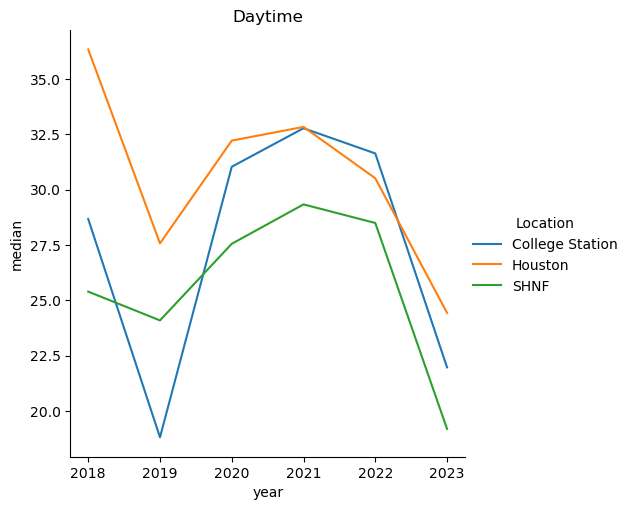

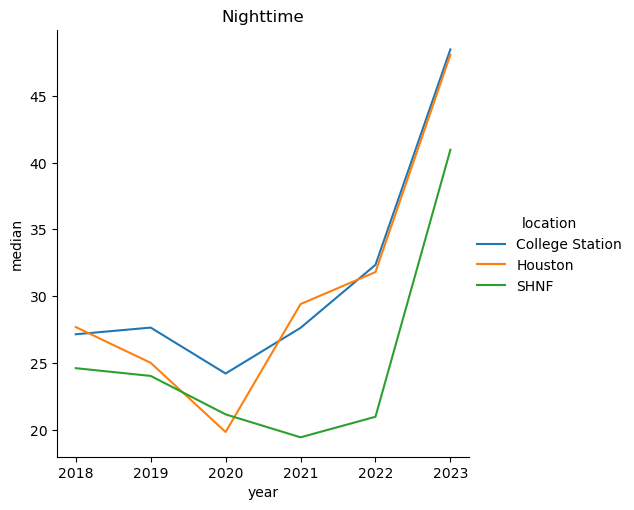

In [12]:
sns.relplot(x="year" , y= "median",
          data = df,
          kind = "line",
          hue = "Location")
plt.title('Daytime')
plt.show()


sns.relplot(x="year" , y = "median",
            data = dg,
            kind = "line",
            hue = "location")
plt.title('Nighttime')
plt.show()

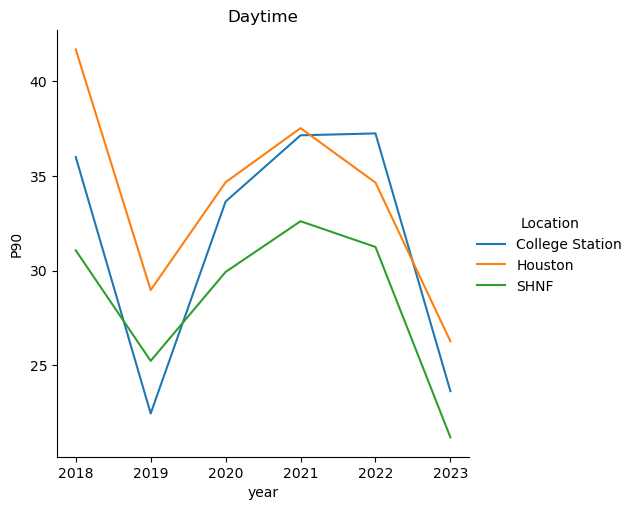

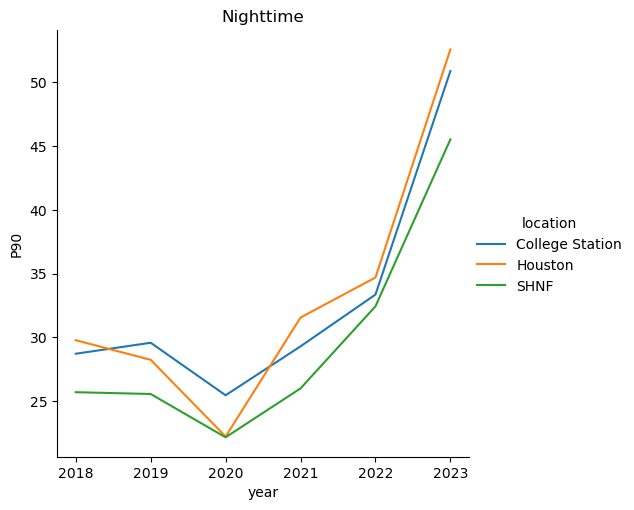

In [11]:
sns.relplot(x="year" , y= "P90",
          data = df,
          kind = "line",
          hue = "Location")
plt.title('Daytime')
plt.show()


sns.relplot(x="year" , y = "P90",
            data = dg,
            kind = "line",
            hue = "location")
plt.title('Nighttime')
plt.show()

### (PART3) Descriptive Statistics

In [6]:
import csv 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [7]:
data = pd.read_csv("box_daytime.csv")
data.head()

,OID,Value,Count,year
0,0,-139,23,2018
1,1,-138,30,2018
2,2,-137,20,2018
3,3,-136,48,2018
4,4,-135,25,2018


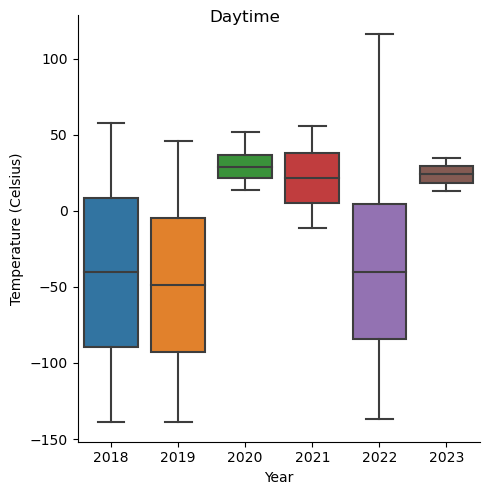

In [8]:
g = sns.catplot(x = "year", y = "Value", data = data, kind = "box")

g.fig.suptitle("Daytime")

g.set(xlabel = "Year", ylabel = "Temperature (Celsius)")

plt.show()

In [9]:
data = pd.read_csv("box_nighttime.csv")
data.head()

,OID,Value,Count,year
0,0,21,15,2018
1,1,22,2822,2018
2,2,23,80189,2018
3,3,24,262220,2018
4,4,25,148674,2018


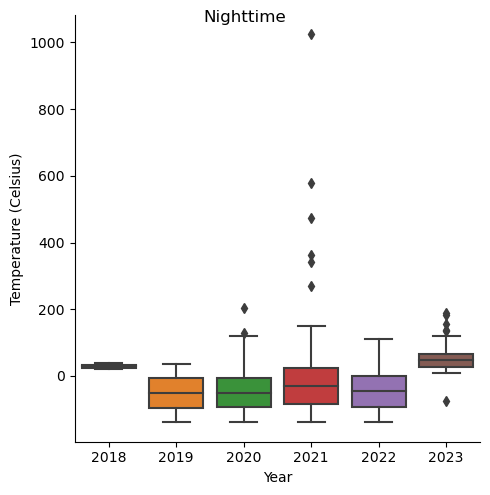

In [10]:
g = sns.catplot(x = "year", y = "Value", data = data, kind = "box")

g.fig.suptitle("Nighttime")

g.set(xlabel = "Year", ylabel = "Temperature (Celsius)")

plt.show()